# Exploratory Data analysis of Iris Data set

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Iris Flower dataset

### Toy Dataset : Iris Dataset-
* It is a  simple dataset to learn the basics
* 3 flowers of Iris species.
* Objective : Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge. 
* Why use petal and sepal dimensions as features?
* Why do we not use 'color ' as a feature?
## Now question arises what is Sepal and Petal?
* Sepal -The outer parts of the flower( often green and leaf-like) that encloses developing bud.
* Petal- The parts of a flower that are often conspicuously colored.


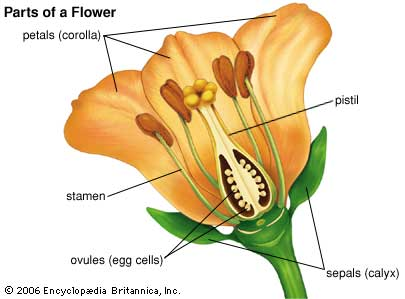

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
flowers_info = pd.read_csv('/kaggle/input/iris/Iris.csv')
flowers_info=flowers_info.drop("Id",axis=1) # Removing ID column.

### Features/Variable/input-variable/independent_variable are-:
* Sepal-length, Sepal-width, petal-Length , petal-width
### Label/dependent-variable/Output-variable/Class/Class-label/Response-label is:
* Species.

In [ ]:
flowers_info.head()# This head() function gives top 5 rows of dataframe.

In [ ]:
flowers_info.describe()

In [ ]:
# columns attribute of panda gives the list of label of all the columns
flowers_info.columns

In [ ]:
flowers_info.info()

In [ ]:
flowers_info['Species'].value_counts()

### Since all the data points of species columns is equal in number , therefore it is balanced datasets

# 1-D Scatter Plot using just one feature


In [ ]:
# 1-D scatter plot of petal-length.
iris_setosa= flowers_info[flowers_info["Species"]=='Iris-setosa']
iris_virginica = flowers_info[flowers_info['Species']=='Iris-virginica']
iris_versicolor = flowers_info[flowers_info['Species'] == 'Iris-versicolor']

plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa['PetalLengthCm']),'o')
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor['PetalLengthCm']),'o')
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica['PetalLengthCm']),'o')

plt.show()                              

## Disadvantages of 1-D Scatter Plot:
* Very hard to make sense as points.
* Are overlapping a lot.


# Univariate analysis

### Distribution Plot for Petal Length

In [ ]:
sns.FacetGrid(flowers_info, hue="Species", height=8, aspect=1) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend();
plt.show();



### Petal Width

In [ ]:
sns.FacetGrid(flowers_info,hue='Species',height=6) \
    .map(sns.histplot,"PetalWidthCm") \
    .add_legend()
plt.show()

### For Sepal length


In [ ]:
sns.FacetGrid(flowers_info, hue="Species", height=6) \
   .map(sns.histplot, "SepalLengthCm") \
   .add_legend();
plt.show();



### For Sepal Width

In [ ]:
sns.FacetGrid(flowers_info, hue="Species", height=6) \
   .map(sns.histplot, "SepalWidthCm") \
   .add_legend();
plt.show();



# Observation after univariate analysis.
- Petal length is better than petal width , petal width is better than sepal length,and, sepal length is better than sepal width ,for analysis purpose of species.
- PL>PW>SL>SW

# PDF ( Probability Distribution Function ) and CDF(Cumulative Distribution Function)

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


In [ ]:



# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


In [ ]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# 2-D Scatter Plot

In [ ]:
flowers_info.plot(kind='scatter', x='SepalLengthCm',y='SepalWidthCm') 
plt.grid()
plt.show()


In [ ]:
# Color-Coding each type of flower with the help of seaborn
sns.set_style('whitegrid');
sns.FacetGrid(flowers_info,hue="Species",height=4,aspect=2)\
    .map(plt.scatter,"SepalLengthCm","SepalWidthCm") \
    .add_legend()
plt.show()


## Observation(s):
1. Using sepal_length and sepal_width features, we can distinguish setosa flowers from others.
2. Separating versicolor from Virginica is much harder as they have considerable overlap.

 # Pair Plot 
 1. Used to visualize features or demensions of data sets, when there are more than three and less than five.
 
 #### Cons
 1. Cannot be used when number of features are high.
 2. It cannot visualize higher dimensional patterns in 3-D and 4-D.
 3. Only possible to view 2D patterns.
 

In [ ]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(flowers_info,hue="Species",height=4)
plt.show()

#### Observations
1. Petal-length and Petal-width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly separable), virnica and versicolor have some overlap(almost linearly separable).
3. We can find 'lines' and "if-else" conditions to build simple model to classify the flower types.

#  Median, Percentile, Quantile, IQR, MAD

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["PetalLengthCm"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["PetalLengthCm"],50)));
print(np.median(iris_virginica["PetalLengthCm"]))
print(np.median(iris_versicolor["PetalLengthCm"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["PetalLengthCm"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],90))
print(np.percentile(iris_virginica["PetalLengthCm"],90))
print(np.percentile(iris_versicolor["PetalLengthCm"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(iris_virginica["PetalLengthCm"]))
print(robust.mad(iris_versicolor["PetalLengthCm"]))


#  Box plot and Whiskers

In [ ]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Species',y='PetalLengthCm', data=flowers_info)
plt.show()


#  Violin plots

In [ ]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Species", y="PetalLengthCm", data=flowers_info, size=10)
plt.show()